In [3]:
# imports and setup
import numpy as np
import pandas as pd

# sklearn imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split, GridSearchCV

# EDA
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
all_features = ['categories', 'price', 'installs', 'rating', 'rating_count', 'stars_5', 'stars_4', 'stars_3', 'stars_2', 'stars_1', 'has_iap', 'in_app_purchases_from', 'in_app_purchases_up_to', 'contains_ads', 'top_charts', 'most_popular_country']

df_games = pd.read_csv(r"df_games.csv")
df = df_games[all_features].copy()

In [5]:
to_categorize = ['categories', 'most_popular_country']
for name in to_categorize:
    df[name] = LabelEncoder().fit_transform(df[name])

Split data into Train and test

In [16]:
X = df.drop(columns = 'top_charts')
y = df['top_charts']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22, test_size=0.2)

Build Random Forest Model with hyperparameters

In [17]:
forest =  RandomForestClassifier(bootstrap=True, n_estimators=250, max_depth=10)

trained_forest = forest.fit(X_train, y_train)

y_pred_train = trained_forest.predict(X_train)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))
print('Precision on training data= ',metrics.precision_score(y_true = y_train, y_pred = y_pred_train))
print('Recall on training data= ',metrics.recall_score(y_true = y_train, y_pred = y_pred_train))
print('F1 on training data= ',metrics.f1_score(y_true = y_train, y_pred = y_pred_train))
print('\n')

y_pred = trained_forest.predict(X_test)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))
print('Precision on test data= ',metrics.precision_score(y_true = y_test, y_pred = y_pred))
print('Recall on test data= ',metrics.recall_score(y_true = y_test, y_pred = y_pred))
print('F1 on test data= ',metrics.f1_score(y_true = y_test, y_pred = y_pred))

Accuracy on training data=  0.9477097069996944
Precision on training data=  0.8178406466512702
Recall on training data=  0.6162714814009136
F1 on training data=  0.7028904602406649


Accuracy on test data=  0.9380840101301197
Precision on test data=  0.7563025210084033
Recall on test data=  0.5545774647887324
F1 on test data=  0.6399187404773996


In [12]:
all_features.remove('top_charts')
featuresDF=pd.DataFrame({"features":all_features,"weights":trained_forest.feature_importances_})
featuresDF.sort_values("weights",ascending=False)

,features,weights
11,in_app_purchases_from,0.153238
12,in_app_purchases_up_to,0.150481
5,stars_5,0.117846
4,rating_count,0.097426
2,installs,0.076128
6,stars_4,0.072712
1,price,0.064465
7,stars_3,0.046477
3,rating,0.043070
8,stars_2,0.037567


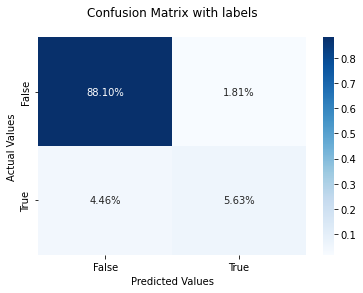

In [13]:
cf_matrix = metrics.confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [14]:
cf_matrix

array([[20176,   415],
       [ 1022,  1289]], dtype=int64)